In [71]:
from sklearn.manifold import TSNE
import numpy as np 
import matplotlib.cm as cm
import torch 
from matplotlib import pyplot as plt

In [ ]:
class DimensionReduction():
    def __init__(self):
        self.registered = False
        
        self.x = []
        self.label = []
        
        
    def _register_x(self, x):
        if type(x) == torch.Tensor:
            assert x.ndim == 2, 'input data tensor should be dimension of two: NUM_DATA * DATA_LENGTH'
            x = np.array(x.detach().cpu())
            self.x.append( x )
        elif type(x) == np.ndarray: 
            assert x.ndim == 2, 'input data array should be dimension of two: NUM_DATA * DATA_LENGTH'
            self.x.append( x ) 
        else:
            assert False, 'non supported data type'
            
        self.last_registered_x_data_num = x.shape[0]
    
            
    def _register_label(self, label):
    
        if type(label) == int: 
            self.label += [label]*self.last_registered_x_data_num
        elif type(label) == str: 
            self.label += [label]*self.last_registered_x_data_num
        elif type(label) == torch.Tensor: 
            assert label.ndim == 1 and len(label) == self.last_registered_x_data_num, 'input label tensor should be dimension of one: NUM_DATA '
            self.label += label.detach().cpu().tolist()
        elif type(label) == np.ndarray: 
            assert label.ndim == 1 and len(label) == self.last_registered_x_data_num, 'input label array should be dimension of one: NUM_DATA '
            self.label += label.tolist()
        else:
            assert False, 'non supported label type'
        
        
    def register(self, x, label):
        
        self._register_x(x)
        self._register_label(label)
                        
        self.registered = True
        
        
    def deregister(self):        
             
        self.x = []
        self.label = []
        self.registered = False   
        
        
    def _regroup_data(self):
        
        unique_labels = list(set(self.label))        
        self.plot_data = {  label:[] for label in unique_labels  }
        
        for x, label in zip( self.reduced_x, self.label ):
            self.plot_data[label].append(x)

        for label in self.plot_data:
            self.plot_data[label] = np.stack( self.plot_data[label] )

        self.colors = cm.rainbow(np.linspace(0, 1, len(unique_labels))) 

        
        
        
    def reduce(self, n_components):
    
        assert n_components in [1, 2], 'This class is for dim reduction and visualization, please reduce to 1 or 2'
        assert self.registered
        
        assert n_components == 2 # for now only support 2 TODO 
        
        self.x = np.concatenate( self.x, axis=0 )
        if len(self.label) != 0:
            assert len(self.x) == len(self.label), 'data and label length are not the same'
            
        print('all registed data has been concat and running TSNE now ... ')        
        tsne = TSNE(n_components=n_components, random_state=0)        
        self.reduced_x = tsne.fit_transform(self.x)  # NUM_DATA * REDUCED_DIM
        print('reduction finished') 
        
        
    def save_fig(self, name, plot_legend=False):
        self._regroup_data()
        
       
        plt.figure()
        for (y, x), c in zip( self.plot_data.items(), self.colors):
            plt.scatter( x[:,0], x[:,1], label=y, color=c )

        plt.legend()
        plt.savefig(name, facecolor='w')

        

In [65]:
dd = DimensionReduction()

In [68]:
dd.register(    np.random.rand(100,512),2   )

In [69]:
dd.reduce(2)

all registed data has been concat and running TSNE now ... 
reduction finished


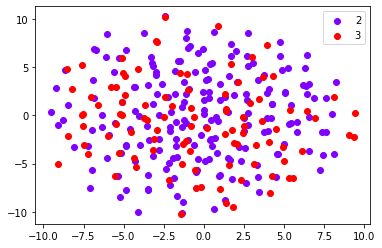

In [70]:
dd.save_fig('x.png')